In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download kinguistics/heartbeat-sounds


Dataset URL: https://www.kaggle.com/datasets/kinguistics/heartbeat-sounds
License(s): CC0-1.0


In [ ]:
!unzip heartbeat-sounds.zip -d heartbeat_sounds


Archive:  heartbeat-sounds.zip
  inflating: heartbeat_sounds/set_a.csv  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201012172010.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201101051105.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201101061552.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201101091156.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201101110659.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201101152256.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201101220549.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201101241434.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201102081033.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201102081045.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201102200848.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__201103011036.wav  
  inflating: heartbeat_sounds/set_a/Aunlabelledtest__2011031402

In [ ]:
import pandas as pd

# Load the metadata files
set_a = pd.read_csv("heartbeat_sounds/set_a.csv")
set_b = pd.read_csv("heartbeat_sounds/set_b.csv")

# Display first few rows of each
print("Set A:")
display(set_a.head())

print("Set B:")
display(set_b.head())


Set A:


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


Set B:


,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [ ]:
print("Set A labels:", set_a['label'].value_counts())
print("Set B labels:", set_b['label'].value_counts())


Set A labels: label
artifact    40
murmur      34
normal      31
extrahls    19
Name: count, dtype: int64
Set B labels: label
normal        320
murmur         95
extrastole     46
Name: count, dtype: int64


In [ ]:
# Combine datasets
df = pd.concat([set_a, set_b], ignore_index=True)

# Drop artifact samples
df = df[df['label'] != 'artifact']

# Normalize label: treat 'extrahls' and 'extrastole' as 'extra'
df['label'] = df['label'].replace({'extrastole': 'extra', 'extrahls': 'extra'})

# Check label counts
print(df['label'].value_counts())


label
normal    351
murmur    129
extra      65
Name: count, dtype: int64


In [ ]:
import os
import librosa
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [ ]:
# Parameters
SAMPLE_RATE = 22050
DURATION = 5  # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION
N_MFCC = 40

def extract_mfcc(file_path, max_pad_len=216):
    try:
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=N_MFCC)

        # Padding or trimming to fixed size
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]

        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [ ]:
# Prepare lists
X = []
y = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    filepath = os.path.join("heartbeat_sounds", row['fname'])
    features = extract_mfcc(filepath)

    if features is not None:
        X.append(features)
        y.append(row['label'])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)


 10%|█         | 80/792 [00:20<00:15, 45.83it/s]<ipython-input-9-859f9a8cb76d>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
100%|██████████| 792/792 [00:21<00:00, 37.58it/s]  

Error processing heartbeat_sounds/set_a/__201012172010.wav: [Errno 2] No such file or directory: 'heartbeat_sounds/set_a/__201012172010.wav'
Error processing heartbeat_sounds/set_a/__201101051105.wav: [Errno 2] No such file or directory: 'heartbeat_sounds/set_a/__201101051105.wav'
Error processing heartbeat_sounds/set_a/__201101061552.wav: [Errno 2] No such file or directory: 'heartbeat_sounds/set_a/__201101061552.wav'
Error processing heartbeat_sounds/set_a/__201101091156.wav: [Errno 2] No such file or directory: 'heartbeat_sounds/set_a/__201101091156.wav'
Error processing heartbeat_sounds/set_a/__201101110659.wav: [Errno 2] No such file or directory: 'heartbeat_sounds/set_a/__201101110659.wav'
Error processing heartbeat_sounds/set_a/__201101152256.wav: [Errno 2] No such file or directory: 'heartbeat_sounds/set_a/__201101152256.wav'
Error processing heartbeat_sounds/set_a/__201101220549.wav: [Errno 2] No such file or directory: 'heartbeat_sounds/set_a/__201101220549.wav'
Error process

In [ ]:
import os

# List top-level files/folders
print("Top-level contents:")
print(os.listdir("heartbeat_sounds"))

# Check if set_a or set_b folders exist
if "set_a" in os.listdir("heartbeat_sounds"):
    print("✅ Found set_a folder")
else:
    print("❌ set_a folder not found")

if "set_b" in os.listdir("heartbeat_sounds"):
    print("✅ Found set_b folder")
else:
    print("❌ set_b folder not found")


Top-level contents:
['set_a.csv', 'set_a_timing.csv', 'set_b.csv', 'set_a', 'set_b']
✅ Found set_a folder
✅ Found set_b folder


In [ ]:
from glob import glob

a_files = glob("heartbeat_sounds/set_a/*.wav")
b_files = glob("heartbeat_sounds/set_b/*.wav")

print(f"Set A audio files: {len(a_files)}")
print(f"Set B audio files: {len(b_files)}")
print("Sample Set A file:", a_files[0] if a_files else "None")
print("Sample Set B file:", b_files[0] if b_files else "None")


Set A audio files: 176
Set B audio files: 656
Sample Set A file: heartbeat_sounds/set_a/normal__201104122156.wav
Sample Set B file: heartbeat_sounds/set_b/normal__134_1306428161797_C.wav


In [ ]:
df['filepath'] = df['fname'].apply(lambda x: os.path.join("heartbeat_sounds", x))


In [ ]:
df = df[df['filepath'].apply(os.path.exists)].reset_index(drop=True)
print("Valid audio files after filtering:", len(df))


Valid audio files after filtering: 84


In [ ]:
valid_labels = {'normal', 'murmur', 'extrastole', 'artifact', 'extrahls'}

clean_data = []

for path in all_files:
    filename = os.path.basename(path).lower()
    label_candidate = filename.split("__")[0]

    if label_candidate in valid_labels:
        clean_data.append({"filepath": path, "label": label_candidate})

df = pd.DataFrame(clean_data)
print(df['label'].value_counts())
print("✅ Total clean files:", len(df))


label
normal        231
murmur        100
extrastole     46
artifact       40
extrahls       19
Name: count, dtype: int64
✅ Total clean files: 436


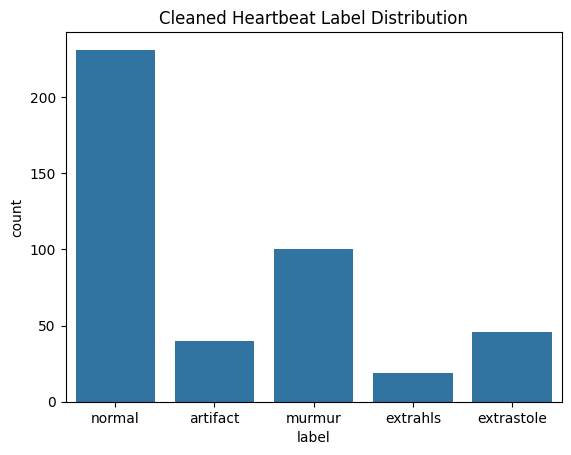

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Cleaned Heartbeat Label Distribution")
plt.show()


In [ ]:
import librosa
import numpy as np
from tqdm import tqdm

SAMPLE_RATE = 22050
DURATION = 5  # seconds
N_MFCC = 40

def extract_mfcc(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=N_MFCC)
        mfcc = mfcc.T  # shape: (time, features)
        if mfcc.shape[0] < 216:  # pad if needed
            pad_width = 216 - mfcc.shape[0]
            mfcc = np.pad(mfcc, ((0, pad_width), (0, 0)), mode='constant')
        else:
            mfcc = mfcc[:216, :]
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [ ]:
X = []
y = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    mfcc = extract_mfcc(row['filepath'])
    if mfcc is not None:
        X.append(mfcc)
        y.append(row['label'])

X = np.array(X)
y = np.array(y)

print("✅ Feature shape:", X.shape)  # should be (num_samples, time_steps, n_mfcc)
print("✅ Label shape:", y.shape)


100%|██████████| 436/436 [00:07<00:00, 55.19it/s]

✅ Feature shape: (436, 216, 40)
✅ Label shape: (436,)


In [ ]:
from IPython.display import Audio, display

# Display audio player
display(Audio(audio, rate=sr))


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to one-hot vectors
y_categorical = to_categorical(y_encoded)

print("✅ Encoded labels shape:", y_categorical.shape)
print("✅ Classes:", label_encoder.classes_)


✅ Encoded labels shape: (436, 5)
✅ Classes: ['artifact' 'extrahls' 'extrastole' 'murmur' 'normal']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

print("✅ Training shape:", X_train.shape, y_train.shape)
print("✅ Testing shape:", X_test.shape, y_test.shape)


✅ Training shape: (348, 216, 40) (348, 5)
✅ Testing shape: (88, 216, 40) (88, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

input_shape = (X.shape[1], X.shape[2], 1)  # Add channel dimension

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 214, 38, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 107, 19, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 107, 19, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 105, 17, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 52, 8, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 52, 8, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 26624)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,408,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,427,845 (13.08 MB)

 Trainable params: 3,427,653 (13.08 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 472ms/step - accuracy: 0.3439 - loss: 7.7326 - val_accuracy: 0.0795 - val_loss: 6.0821
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 481ms/step - accuracy: 0.6101 - loss: 1.1928 - val_accuracy: 0.0909 - val_loss: 4.9371
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - accuracy: 0.6987 - loss: 0.7800 - val_accuracy: 0.0909 - val_loss: 2.7360
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.6668 - loss: 0.7856 - val_accuracy: 0.5341 - val_loss: 1.4725
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.6736 - loss: 0.6719 - val_accuracy: 0.5568 - val_loss: 1.1162
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.7774 - loss: 0.5468 - val_accuracy: 0.5909 - val_loss: 0.9250
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 349ms/step - accuracy: 0.7541 - loss: 0.5497 - val_accuracy: 0.3636 - val_loss: 1.0470
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 465ms/step - accuracy: 0.8478 - loss: 0.4683 - val_accuracy: 0

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7035 - loss: 0.8705
✅ Test Accuracy: 0.7273
✅ Test Loss: 0.8013


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step
📋 Classification Report:

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00         8
    extrahls       0.00      0.00      0.00         4
  extrastole       1.00      0.11      0.20         9
      murmur       1.00      0.45      0.62        20
      normal       0.67      0.98      0.79        47

    accuracy                           0.73        88
   macro avg       0.73      0.51      0.52        88
weighted avg       0.78      0.73      0.68        88



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


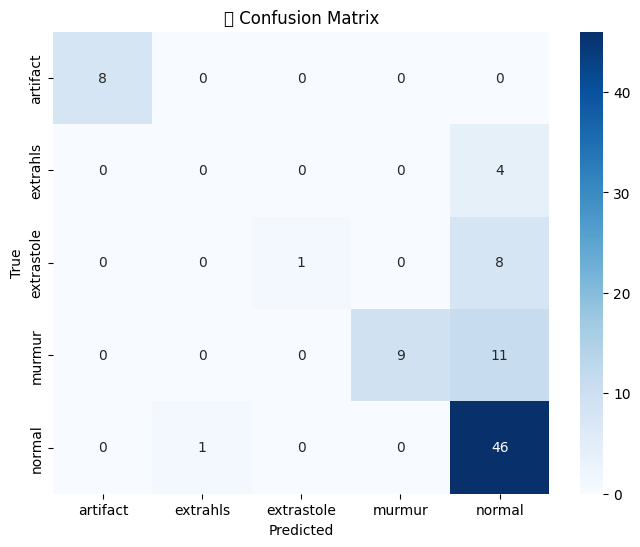

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Print classification report
print("📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("🧠 Confusion Matrix")
plt.show()


<ipython-input-27-10f1ac9132dd>:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-10f1ac9132dd>:21: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


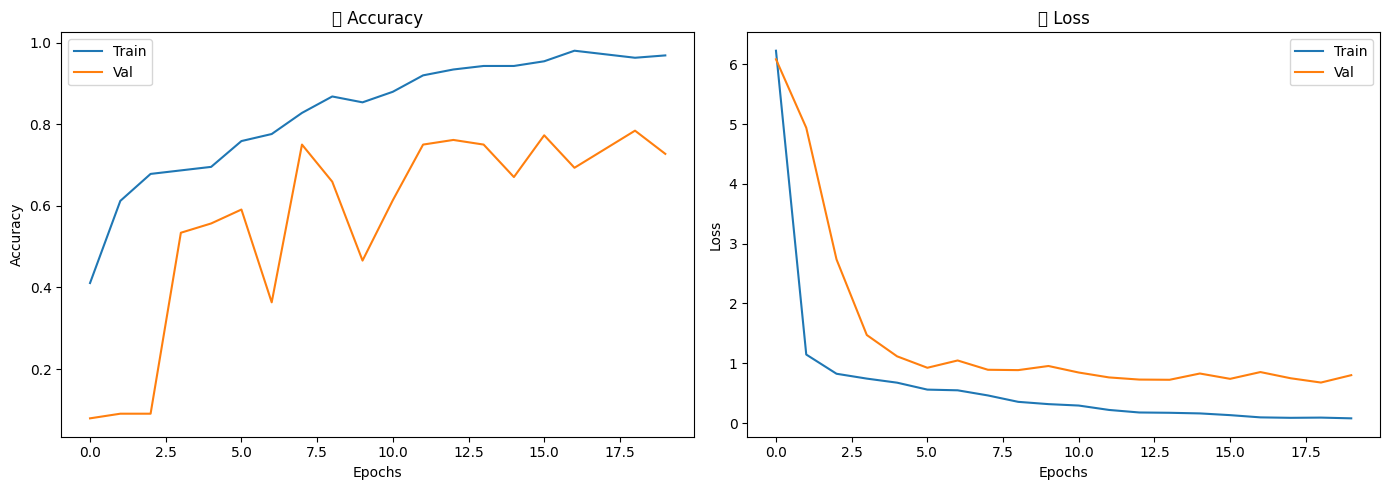

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Val")
plt.title("📈 Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Val")
plt.title("📉 Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


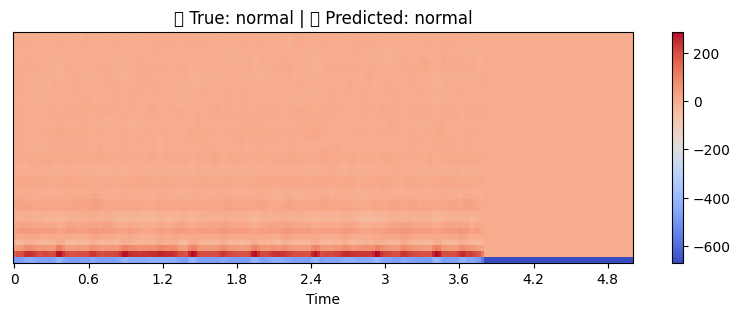

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

file_path = '/content/heartbeat_sounds/set_b/normal__113_1306244002866_D.wav'  # Update as needed

# Load audio
audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

# Pad or truncate
if len(audio) < SAMPLES_PER_TRACK:
    audio = np.pad(audio, (0, SAMPLES_PER_TRACK - len(audio)))
else:
    audio = audio[:SAMPLES_PER_TRACK]

# Show player to listen
display(Audio(audio, rate=sr))

# Extract MFCCs
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

# Prepare input
input_shape = model.input_shape
if len(input_shape) == 3:
    mfcc_input = np.expand_dims(mfcc.T, axis=0)
elif len(input_shape) == 4:
    mfcc_input = np.expand_dims(mfcc.T, axis=0)
    mfcc_input = np.expand_dims(mfcc_input, axis=-1)
else:
    raise ValueError("Unexpected model input shape:", input_shape)

# Predict
prediction = model.predict(mfcc_input)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

# (Optional) manually set true label
true_label = 'normal'

# Plot MFCC
plt.figure(figsize=(10, 3))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title(f"🎧 True: {true_label} | 🤖 Predicted: {predicted_label}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


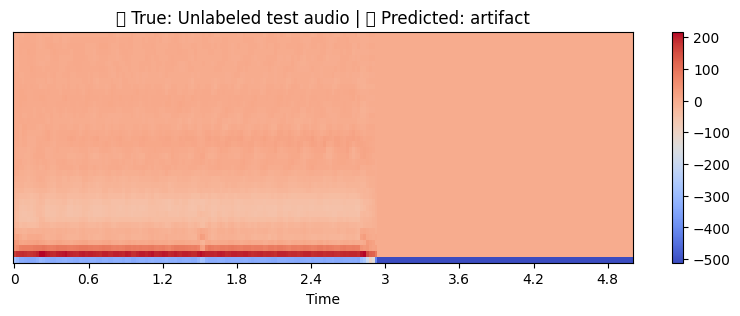

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

file_path = '/content/heartbeat_sounds/set_a/Aunlabelledtest__201106010807.wav'  # Update as needed

# Load audio
audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

# Pad or truncate
if len(audio) < SAMPLES_PER_TRACK:
    audio = np.pad(audio, (0, SAMPLES_PER_TRACK - len(audio)))
else:
    audio = audio[:SAMPLES_PER_TRACK]

# Show player to listen
display(Audio(audio, rate=sr))

# Extract MFCCs
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

# Prepare input
input_shape = model.input_shape
if len(input_shape) == 3:
    mfcc_input = np.expand_dims(mfcc.T, axis=0)
elif len(input_shape) == 4:
    mfcc_input = np.expand_dims(mfcc.T, axis=0)
    mfcc_input = np.expand_dims(mfcc_input, axis=-1)
else:
    raise ValueError("Unexpected model input shape:", input_shape)

# Predict
prediction = model.predict(mfcc_input)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

# (Optional) manually set true label
true_label = 'Unlabeled test audio'

# Plot MFCC
plt.figure(figsize=(10, 3))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title(f"🎧 True: {true_label} | 🤖 Predicted: {predicted_label}")
plt.show()
